In [8]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)

In [12]:
df.shape

(1797, 64)

In [14]:
df.sample()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1254,0.0,0.0,0.0,6.0,16.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,16.0,3.0,0.0,0.0


In [16]:
import matplotlib.pyplot as plt 

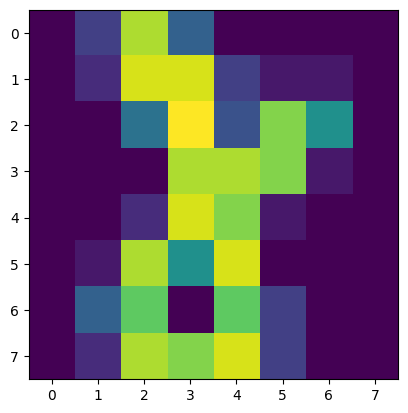

In [28]:
plt.imshow(df.iloc[1154,0 :].values.reshape(8,8))

In [30]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

1.542853832244873


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

In [59]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [61]:
x_train_trf.shape

(1437, 20)

In [63]:
knn = KNeighborsClassifier()

In [65]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [67]:
y_pred = knn.predict(x_test_trf)

In [69]:
accuracy_score(y_test,y_pred)

1.0

In [75]:
for i in range(1,64):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(x_train_trf,y_train)
    
    y_pred = knn.predict(x_test_trf)
    
    print(accuracy_score(y_test,y_pred))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [95]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [97]:
x_train_trf

array([[-0.89165303, -4.74167035],
       [-1.18767679, -1.85080876],
       [-3.33677132, -1.90074688],
       ...,
       [ 1.63986295,  2.2971521 ],
       [-1.68953873,  1.84506575],
       [-0.33256107, -0.34391184]])

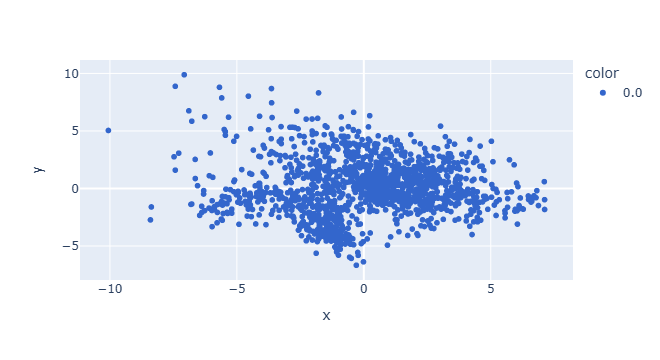

In [99]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_trf[:,0],
                 y=x_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [113]:
# transforming in 3D
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [115]:
x_train_trf

array([[-0.89165303, -4.74167035, -0.29068891],
       [-1.18767679, -1.85080876, -3.79579877],
       [-3.33677132, -1.90074688, -1.95577585],
       ...,
       [ 1.63986295,  2.2971521 ,  0.47282308],
       [-1.68953873,  1.84506575,  0.30431055],
       [-0.33256107, -0.34391184,  4.46957369]])

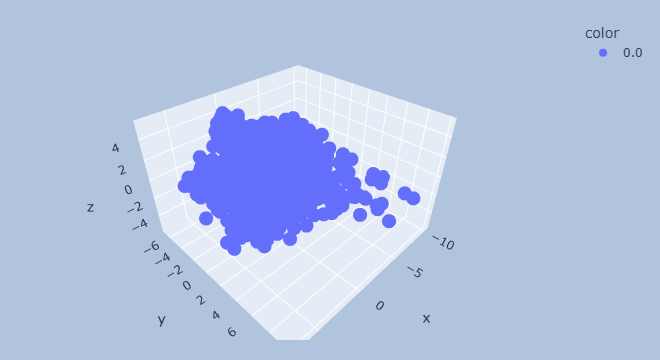

In [117]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=x_train_trf[:,0], y=x_train_trf[:,1], z=x_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [119]:
# Eigen values
pca.explained_variance_

array([7.34829746, 5.94132404, 5.22634794])

In [121]:
# Eigen vectors
pca.components_.shape

(3, 63)

In [123]:
pca.explained_variance_ratio_

array([0.12038006, 0.09733098, 0.08561821])

In [125]:
pca = PCA(n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [127]:
pca.explained_variance_.shape

(63,)

In [129]:
pca.components_.shape

(63, 63)

In [131]:
np.cumsum(pca.explained_variance_ratio_)

array([0.12038006, 0.21771104, 0.30332925, 0.36826702, 0.41714616,
       0.45978663, 0.49928022, 0.53277655, 0.56301219, 0.59233154,
       0.62005188, 0.64549785, 0.66852848, 0.6913693 , 0.71258671,
       0.73154928, 0.74902345, 0.76506686, 0.78091696, 0.7960052 ,
       0.80940266, 0.82213528, 0.8335177 , 0.84395064, 0.85380441,
       0.86317825, 0.87170997, 0.88007258, 0.88804326, 0.89561788,
       0.90262188, 0.90952455, 0.91595372, 0.92208277, 0.92782559,
       0.93320246, 0.93822897, 0.94298975, 0.94750865, 0.95180607,
       0.95591232, 0.95980176, 0.96338899, 0.9667563 , 0.96993935,
       0.97301389, 0.97583219, 0.97854028, 0.98107353, 0.98335306,
       0.98550739, 0.9874263 , 0.98930111, 0.99109424, 0.99270038,
       0.99423331, 0.99566409, 0.99695202, 0.99818375, 0.99921953,
       1.        , 1.        , 1.        ])

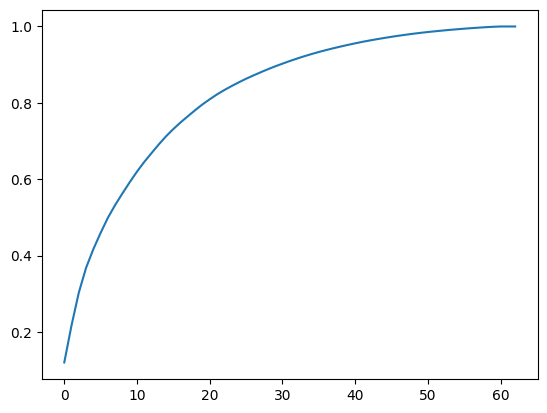

In [133]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))